### This is my binary classifier for detecting AI art vs Human art
This project is for creating a better model for Art detection and predicting if a given art piece is AI made or Human made.


In [2]:
#Loading dependencies
import tensorflow as tf
import os
import cv2
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#now i need to ceate a dataset of following structure
# AI_Identifier
#     |_Main_dataset
#     |    |__AI
#     |    |   |_Multiple art pieces of made by AI 
#     |    |__Human
#     |        |_Multiple art pieces made by hummans
#     |__dataset_used
#     |    |_Training_dataset(90% of Main_data)
#     |    |    |__AI
#     |    |    |    |_Multiple art pieces of made by AI to be used for training
#     |    |    |__Human
#     |    |         |_Multiple art pieces made by hummans to be used for training
#     |    |_Validation_dataset(10% of main data)
#     |        |__AI
#     |        |    |_Multiple art pieces of made by AI to be used for validation
#     |        |__Human
#     |             |_Multiple art pieces made by hummans to be used for validation
#     |_Model_saved

### Creating dataset

In [4]:
#creating human dataset
def create_human_dataset(human_art_dir, ai_images_count, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List all subdirectories (each representing a category) in the human_art_dir
    categories = [d for d in os.listdir(human_art_dir) if os.path.isdir(os.path.join(human_art_dir, d))]
    
    # Calculate the number of images to take from each category
    num_categories = len(categories)
    images_per_category = ai_images_count // num_categories
    
    for category in categories:
        category_path = os.path.join(human_art_dir, category)
        images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img))]
        
        # If the category has fewer images than required, take all images
        if len(images) < images_per_category:
            selected_images = images
        else:
            selected_images = random.sample(images, images_per_category)
        
        # Copy selected images to the output directory
        for img in selected_images:
            src_path = os.path.join(category_path, img)
            dest_path = os.path.join(output_dir, f"{category}_{img}")
            shutil.copyfile(src_path, dest_path)
    
    print(f"Dataset created with {ai_images_count} images in '{output_dir}'")

In [5]:
#directories locations
#human art from wiki art
human_art_dir = "D:\Computer Science\Projects\AI projects\Art Classifier\Datasets"
#number of images in AI dataset
ai_images_count = 13843  # Example number of AI images you have
#path to dataset of human art from all categories
output_dir = "D:\Computer Science\Projects\AI projects\AI_Identifier\Main_dataset\Human"
#created human dataset in 4m 36s
create_human_dataset(human_art_dir, ai_images_count, output_dir)

Dataset created with 13843 images in 'D:\Computer Science\Projects\AI projects\AI_Identifier\Main_dataset\Human'


### Creating final dataset split

In [7]:
#Now we split our dataset into train and validation split

def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        shutil.copyfile(this_file, destination)

    for filename in valid_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(VALIDATION, filename)
        shutil.copyfile(this_file, destination)

In [2]:
#List directories to be used in spliting

training_dir = r"D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Training_Dataset\\"
validation_dir = r"D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset\\"

AI_Art_SOURCE_DIR = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Main_dataset\AI\\'
TRAINING_AI_Art_DIR = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Training_Dataset\AI\\'
VALID_AI_Art_DIR = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset\AI\\'

Human_Art_SOURCE_DIR = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Main_dataset\Human\\'
TRAINING_Human_Art_DIR = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Training_Dataset\Human\\'
VALID_Human_Art_DIR = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset\Human\\'

In [9]:
#setting split of 90-10 as dataset is of 22gb
#it took me 4m 30s to run this script

split_size = .9

split_data(AI_Art_SOURCE_DIR, TRAINING_AI_Art_DIR, VALID_AI_Art_DIR , split_size)

split_data(Human_Art_SOURCE_DIR, TRAINING_Human_Art_DIR, VALID_Human_Art_DIR , split_size)

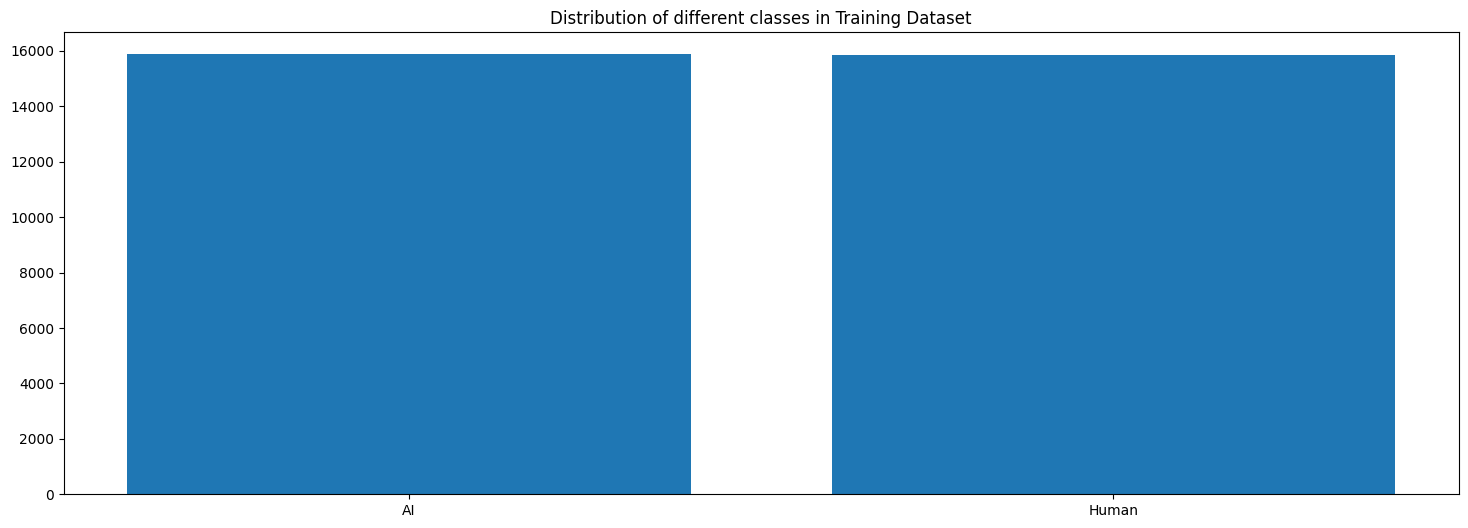




Training AI images are: 15879
Training Human images are: 15851


In [10]:
#Looking at data in training part

image_folder = ["AI" , "Human"]

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Training_Dataset\\'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Training_Dataset\\'+i+'/'))))

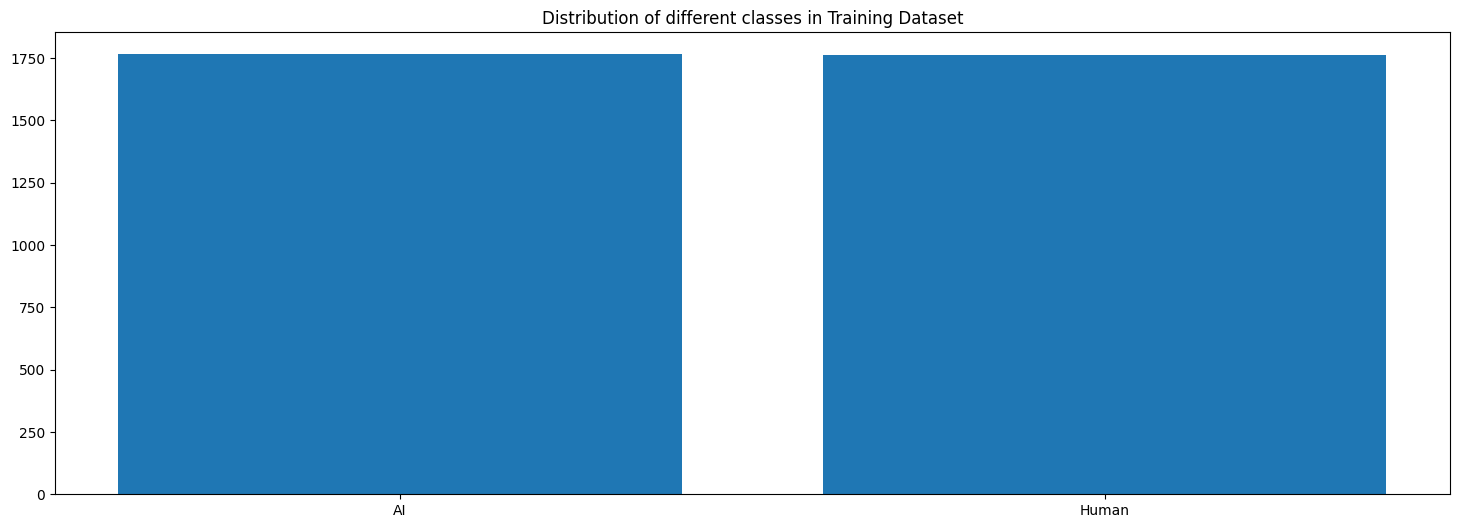




Training AI images are: 1765
Training Human images are: 1762


In [11]:
#Looking at data in training part

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset\\'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset\\'+i+'/'))))

### Training Neural Network using Transfer learning

In [5]:
#get ImageDataGenerator for greating datagen
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#get ResNet50 for using as base model
from tensorflow.keras.applications import ResNet50
#take Dense and GlobalAveragePooling2D layers to create new layer at end
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
#we use model for
from tensorflow.keras.models import Model
#we get Adam for optimizer to use
from tensorflow.keras.optimizers import Adam
#we use EarlyStopping and ModelCheckpoint for respective functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
#change decompression limit to have no error by PIL when handeling large images
from PIL import Image

# Increase the decompression bomb threshold
Image.MAX_IMAGE_PIXELS = None

In [5]:
#checking python version
import platform

# Check Python version
python_version = platform.python_version()
print("Python version:", python_version)
# #Check tensorflow version
try:
    import tensorflow as tf
    print("TensorFlow version:", tf.__version__)
except ImportError:
    print("TensorFlow is not installed in this environment.")

Python version: 3.11.5
TensorFlow version: 2.16.2


In [6]:
#Check if gpu is allocated
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [7]:
#Limit gpu usage to reasonable level and avoid OOM errors

# List available physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth for each GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

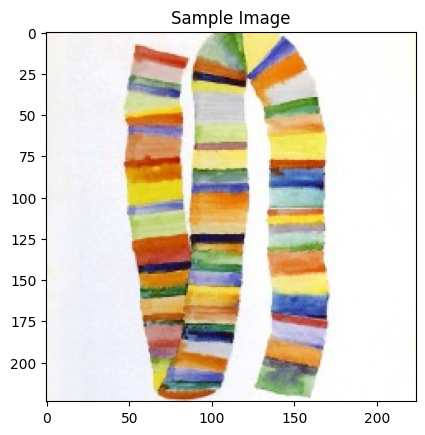

image width =224
image height = 224


In [8]:
#data visualization from directory
from PIL import Image
#Setting image height and width and batch size
img_width=255; img_height=255
Batch_size=16
# Directory containing the images either human art or ai art
image_directory = TRAINING_Human_Art_DIR  # Update with the correct path

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Choose the first image from the list
image_path = os.path.join(image_directory, image_files[0])

# Open the image using PIL
img = Image.open(image_path)

# Plot the image
plt.imshow(img)
plt.title('Sample Image')
plt.show()
#image dimensions
w,h = img.size
print(f"image width ={w}\nimage height = {h}")

In [9]:
#Setting image height and width and batch size
img_width=224; img_height=224
Batch_size_selected =32

In [10]:
# Paths to your dataset
train_dir = 'D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Training_Dataset'
validation_dir = 'D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset'

In [11]:
#create train_datagen for training_dataset
#rescale by 1./255,flip=true,rotation=20,zoom=0.2
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

#create validation_datagen for validation_dataset
#just rescale by 1./255
validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#create train_generator using train_datagen
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size= Batch_size_selected,
    class_mode='categorical'
)

Found 31727 images belonging to 2 classes.


In [13]:
#create validation_generator using validation_datagen
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height,img_width),
    batch_size= Batch_size_selected,
    class_mode='categorical'
)

Found 3527 images belonging to 2 classes.


In [14]:
#load the pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [15]:
#add custom layers

#take base model output
x = base_model.output
#add globalaveragpooling2d to input x
x = GlobalAveragePooling2D()(x)
#add a dense layer with 1024 neurons and relu activation
x = Dense(1024, activation='relu')(x)
#add a dropout layer with 50% probability to x and prevent overfitting
x = Dropout(0.5)(x)
#make predictions on final dense layer with num_classes as number of neurons and softmax activation on x
predictions = Dense(2, activation='sigmoid')(x)  # Use 'sigmoid' for binary classification


#create new model from base model
new_model = Model(inputs=base_model.input, outputs=predictions)


In [16]:
#freeze layers of base model
for layer in base_model.layers:
    layer.trainable = False

In [151]:
#implementing early stopping and model checkpoint
model_save_location = os.path.join('D:', 'Computer Science', 'Projects', 'AI projects', 'AI_Identifier', 'Model_Saves', 'best_model.keras')
#print(model_save_location)
#model_save_location = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Model_Saves\best_model.keras'
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint(model_save_location, save_best_only=True, monitor='val_loss')

In [152]:
#compile the model
new_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#get new_model summary
new_model.summary()

In [153]:
# Train the model-----took me nearly 312m 40.5s to train
history = new_model.fit(train_generator,
                        epochs=10,
                        validation_data = validation_generator,
                        callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1875s 942ms/step - accuracy: 0.6101 - loss: 0.6767 - val_accuracy: 0.6697 - val_loss: 0.6114
Epoch 2/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1930s 972ms/step - accuracy: 0.6476 - loss: 0.6267 - val_accuracy: 0.6833 - val_loss: 0.5968
Epoch 3/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1905s 959ms/step - accuracy: 0.6608 - loss: 0.6184 - val_accuracy: 0.6961 - val_loss: 0.5821
Epoch 4/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1840s 926ms/step - accuracy: 0.6713 - loss: 0.6086 - val_accuracy: 0.6992 - val_loss: 0.5698
Epoch 5/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1838s 925ms/step - accuracy: 0.6784 - loss: 0.6016 - val_accuracy: 0.6932 - val_loss: 0.5767
Epoch 6/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1873s 943ms/step - accuracy: 0.6826 - loss: 0.5957 - val_accuracy: 0.7065 - val_loss: 0.5637
Epoch 7/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1835s 924ms/step - accuracy: 0.6892 - loss: 0.5885 - val_accuracy: 0.7153 - val_loss: 0.5558
Epoch 8/10
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 1842s 928ms/s

In [154]:
#saving the model manually as .h5
new_model.save("D:\Computer Science\Projects\AI projects\AI_Identifier\Model_Saves\AI_Human_Art.h5")

In [156]:
#gaining metrics from history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

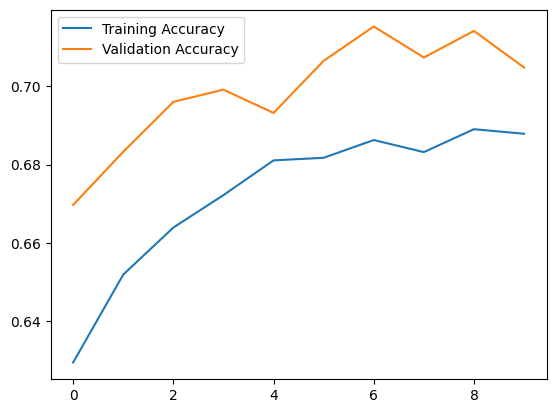

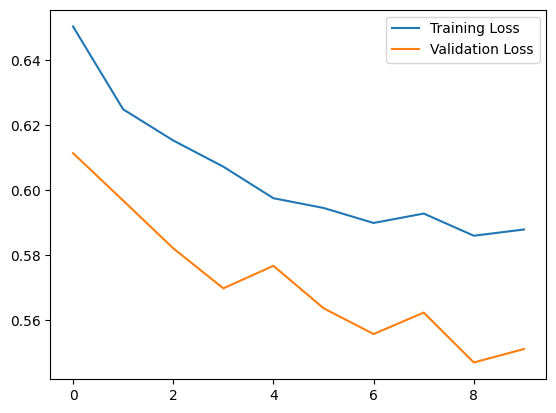

In [158]:
#plotting train and validation accuracy and losses

#accuracy compare
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

#loss compare
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.show()



### Fine tunning model

In [17]:
#loading model
new_model = tf.keras.models.load_model('Model_Saves_keras/best_model.keras')

In [18]:
#unfreezing last few layers of base model
for layer in base_model.layers[-7:]:
    layer.trainable = True

In [19]:
# recompiling with smaller llearnig rate
new_model.compile(optimizer=Adam(learning_rate=1e-5),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [20]:
#implementing early stopping and model checkpoint for fine tuning model
#model_save_location = os.path.join('D:', 'Computer Science', 'Projects', 'AI projects', 'AI_Identifier', 'Model_Saves', 'best_model.keras')
#print(model_save_location)
model_save_location = r'D:\Computer Science\Projects\AI projects\AI_Identifier\Fine_tuning_models\finetune_model_V1.keras'
early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True,  patience=3)
model_checkpoint = ModelCheckpoint(model_save_location, save_best_only=True, save_freq='epoch', monitor='val_loss', mode= 'min')

In [21]:
#retrain for fine tuning model - it took me 287m 19.5s to train this model

history_fine = new_model.fit(train_generator,
                            epochs=10,
                            validation_data=validation_generator,
                            callbacks=[early_stopping, model_checkpoint])

Epoch 1/10


c:\Users\malha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\malha\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


992/992 ━━━━━━━━━━━━━━━━━━━━ 1982s 2s/step - accuracy: 0.6987 - loss: 0.5803 - val_accuracy: 0.7159 - val_loss: 0.5503
Epoch 2/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 1881s 2s/step - accuracy: 0.7029 - loss: 0.5736 - val_accuracy: 0.7108 - val_loss: 0.5519
Epoch 3/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 1850s 2s/step - accuracy: 0.7071 - loss: 0.5678 - val_accuracy: 0.7134 - val_loss: 0.5514
Epoch 4/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 1867s 2s/step - accuracy: 0.7103 - loss: 0.5709 - val_accuracy: 0.7134 - val_loss: 0.5503
Epoch 5/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 1889s 2s/step - accuracy: 0.6990 - loss: 0.5773 - val_accuracy: 0.7117 - val_loss: 0.5489
Epoch 6/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 1963s 2s/step - accuracy: 0.7075 - loss: 0.5684 - val_accuracy: 0.7131 - val_loss: 0.5479
Epoch 7/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 1887s 2s/step - accuracy: 0.7106 - loss: 0.5620 - val_accuracy: 0.7122 - val_loss: 0.5485
Epoch 8/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 1931s 2s/step - accuracy: 0.7081 - loss: 0.5665 - val_accurac

In [23]:
#manually save model as .h5 for further uses
new_model.save(r"D:\Computer Science\Projects\AI projects\AI_Identifier\Fine_tunning_model_for_app\finetune_model.h5")

In [25]:
#gaining metrics from history for fine tuned model
training_loss = history_fine.history['loss']
training_accuracy = history_fine.history['accuracy']
validation_loss = history_fine.history['val_loss']
validation_accuracy = history_fine.history['val_accuracy']

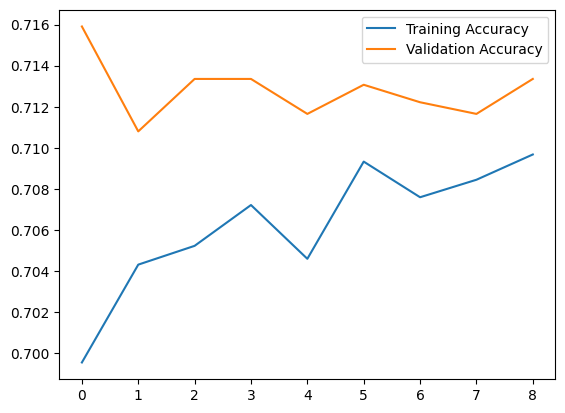

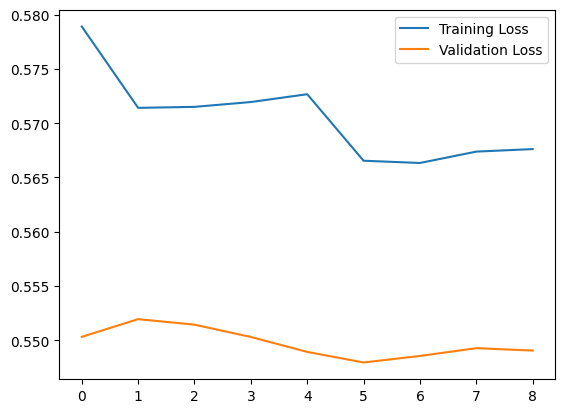

In [27]:
#plotting train and validation accuracy and losses

#accuracy compare
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

#loss compare
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.show()

# Evaluate the fine-tuned model accuracy and loss
#new_model.load_weights(model_save_location)
#val_loss, val_accuracy = new_model.evaluate(validation_generator)
#print(f'Validation accuracy: {val_accuracy * 100:.2f}% \n Validation loss: {val_loss *100:.2f}%')

### Testing models

In [7]:

#loading data
from tensorflow.keras.models import load_model
model_v1__computed = load_model(r"Model_Saves_keras\best_model.keras")
finetuned_model_computed = load_model(r"Fine_tuning_models\finetune_model_V1.keras")
img_height , img_width = 224 , 224

In [13]:
#Preprocessing data to test on
from tensorflow.keras.preprocessing import image

#set threshold
threshold = 0.5

def preprocess(test_dir):
    #for image in os.listdir(test_dir):
    #    image_path = os.path.join(test_dir,image)
    image_path = test_dir
    print(image_path)
    image_loaded = image.load_img(image_path , target_size = (img_height , img_width))
    image_array = image.img_to_array(image_loaded)
    img_array = np.expand_dims(image_array, axis=0)
    img_array /= 255.0
    prediction = finetuned_model_computed.predict(img_array)
    print(prediction)
    if prediction[0][0] > threshold:
        print(f"predicted value = {prediction[0][0]} and class AI ")
        return("AI")
    else:
        print(f"predicted value = {prediction[0][0]} and class Human ")
        return("Human")


In [15]:
#call preprocess and predict
image_path = r"D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset\AI\1638.jpg"
answer = preprocess(image_path)

D:\Computer Science\Projects\AI projects\AI_Identifier\Dataset_used\Validation_dataset\AI\1638.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[0.8355458 0.1651766]]
predicted value = 0.8355457782745361 and class AI 
